In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [2]:
print(tf.version.VERSION)

2.11.0


In [3]:
df=pd.read_excel('./dataset/Data_Train.xlsx')

In [4]:
df

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


In [5]:
df.shape

(7628, 2)

In [6]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [7]:
#Politics: 0 Technology: 1 Entertainment: 2 Business: 3

In [8]:
df=df.rename(columns={"STORY": "text","SECTION": "target"})

In [9]:
print((df.target == 0).sum()) # Not interest
print((df.target == 1).sum()) # interest
print((df.target == 2).sum()) # interest
print((df.target == 3).sum()) # Not interest

1686
2772
1924
1246


In [10]:
# Preprocessing
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

In [12]:
df["text"] = df.text.map(remove_URL) 
df["text"] = df.text.map(remove_punct)

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WangHongfei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
print(list(stop)[0:100])

['is', "mustn't", 'shan', 'while', 'having', 'am', 'has', 'and', 'here', 'an', 'both', 'then', 'there', "wouldn't", "won't", 'how', 'nor', 'into', "you'll", 'their', 'before', 'd', 'themselves', 'hers', 'this', 'on', "needn't", 'ain', 'yourself', 'our', 'those', 'at', 'own', 'o', 'below', 'isn', 'ourselves', 'each', 'if', "hasn't", 'aren', 'again', 'such', 'needn', "you've", 'you', 'by', 'to', 'which', 'don', 'some', 'in', 'who', 'where', 'most', 'were', 'being', 'over', 'all', 'with', "don't", 'doing', "you're", "it's", 'can', 'them', 'did', 'than', 'didn', 'when', 'she', 'from', 'will', "couldn't", 'too', 'the', 'same', "didn't", 'weren', 'him', 'herself', 'won', 'so', 'was', 'what', "she's", "haven't", 'these', 'a', 'hasn', "weren't", 'more', 'off', 'just', 'we', 'not', 'haven', "that'll", "you'd", 'but']


In [15]:
df["text"] = df.text.map(remove_stopwords)

In [16]:
df.text

0       painful huge reversal fee income unheard among...
1       formidable opposition alliance among congress ...
2       asian currencies trading lower today south kor...
3       want answer question click ‘answer’ clicking a...
4       global markets gold prices edged today disappo...
                              ...                        
7623    karnataka congress bastion also gave bjp first...
7624    film also features janhvi kapoor revolve aroun...
7625    database created bringing together criminal re...
7626    state uneasy relationship mainland since days ...
7627    virus stars kunchacko boban tovino thomas indr...
Name: text, Length: 7628, dtype: object

In [17]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)

In [18]:
len(counter)

43490

In [19]:
counter

Counter({'painful': 8,
         'huge': 126,
         'reversal': 6,
         'fee': 27,
         'income': 191,
         'unheard': 1,
         'among': 487,
         'private': 170,
         'sector': 144,
         'lenders': 33,
         'essentially': 32,
         'means': 168,
         'yes': 79,
         'bank': 432,
         'took': 202,
         'granted': 14,
         'fees': 43,
         'structured': 9,
         'loan': 92,
         'deals': 53,
         'paid': 77,
         'accounted': 29,
         'upfront': 10,
         'books': 30,
         'borrowers': 12,
         'turned': 88,
         'defaulters': 1,
         'tied': 28,
         'fell': 221,
         'cracks': 3,
         'gill': 12,
         'vowed': 5,
         'shift': 78,
         'safer': 12,
         'accounting': 26,
         'practice': 28,
         'amortizing': 1,
         'rather': 84,
         'booking': 12,
         'gill’s': 2,
         'move': 237,
         'mend': 2,
         'past': 301,
         

In [20]:
counter.most_common(5)

[('said', 3707),
 ('also', 2627),
 ('new', 1943),
 ('india', 1823),
 ('congress', 1643)]

In [21]:
num_unique_words = len(counter)

In [22]:
# Split dataset into training and validation set
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
train_sentences = train_df.text.to_numpy()
train_labels = train_df.target.to_numpy()
val_sentences = val_df.text.to_numpy()
val_labels = val_df.target.to_numpy()

In [23]:
train_labels=pd.get_dummies(train_df['target']).values

In [24]:
train_df.target.value_counts()

1    2209
2    1542
0    1362
3     989
Name: target, dtype: int64

In [25]:
train_labels

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [26]:
val_labels=pd.get_dummies(val_df['target']).values

In [27]:
val_df.target.value_counts()

1    563
2    382
0    324
3    257
Name: target, dtype: int64

In [28]:
val_labels

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [29]:
train_sentences.shape, val_sentences.shape

((6102,), (1526,))

In [30]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [31]:
word_index = tokenizer.word_index

In [32]:
word_index

{'said': 1,
 'also': 2,
 'new': 3,
 'india': 4,
 'congress': 5,
 'bjp': 6,
 'one': 7,
 'party': 8,
 'year': 9,
 'like': 10,
 'people': 11,
 'would': 12,
 'two': 13,
 'first': 14,
 'last': 15,
 'us': 16,
 'time': 17,
 'elections': 18,
 'data': 19,
 'government': 20,
 'minister': 21,
 'users': 22,
 'smartphone': 23,
 'may': 24,
 'modi': 25,
 'market': 26,
 'state': 27,
 'sabha': 28,
 'lok': 29,
 'company': 30,
 'even': 31,
 'seats': 32,
 'film': 33,
 'election': 34,
 'apple': 35,
 'years': 36,
 'according': 37,
 'three': 38,
 'could': 39,
 'chief': 40,
 'since': 41,
 'facebook': 42,
 'political': 43,
 'back': 44,
 'million': 45,
 'made': 46,
 'app': 47,
 'indian': 48,
 'google': 49,
 'pro': 50,
 'however': 51,
 'crore': 52,
 'phone': 53,
 'delhi': 54,
 'get': 55,
 'many': 56,
 'make': 57,
 'well': 58,
 'camera': 59,
 'take': 60,
 '2019': 61,
 'note': 62,
 'around': 63,
 'samsung': 64,
 'including': 65,
 'companies': 66,
 'work': 67,
 'april': 68,
 'galaxy': 69,
 'growth': 70,
 'says': 71

In [33]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [34]:
len(train_sequences)

6102

In [35]:
countmax=0
for i in train_sequences:
    if len(i)> countmax:
        countmax=len(i)

In [36]:
countmax

574

In [37]:
countmin=100000
for i in train_sequences:
    if len(i)< countmin:
        countmin=len(i)

In [38]:
countmin

7

In [39]:
kounter=0
for i in train_sequences:
    if len(i)< 200:
        kounter=kounter+1

In [40]:
kounter

5966

In [41]:
print(train_sentences[10:15])
print(train_sequences[10:15])

['“one would think development testing process would’ve uncovered many flaws yet proceeded put market anyway said bryan vice president devices research consultancy idc “clearly can’t afford another embarrassing note 7like incident lest build reputation releasing unreliable products note 7 episode triggered global recall cost company billions dollars marred reputation battled apple inc premium devices pulling fold lets korean giant address potential issues races put flexible gadget ahead chinese rival huawei technologies co xiaomi corp samsung spokeswoman declined comment story shares company hasn’t set another date commercial launch little changed seoul wednesday samsung bounced back since note 7 — remains world’s largest producer smartphones memory chips counting folding devices extend lead mobile kickstart stagnating global market unveiled along 10thanniversary version flagship galaxy phone fold underscored samsung’s ambitions like product makes struggling ward hardcharging rivals su

In [42]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 200

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((6102, 200), (1526, 200))

In [43]:
train_padded[10]

array([ 4085,    12,   229,   323,  1552,   502, 11469,  8524,    56,
        6901,   285, 14272,   310,    26,  5854,     1, 20239,  1511,
          72,   129,   257,  3905,  1893, 14273,  1371,  5442,   126,
        9720,    62, 20240,  3283, 20241,   772,  3906,  2566, 14274,
         307,    62,   131,  1083,  2830,    88,  4537,   492,    30,
        5443,  1846,  7591,  3906, 14275,    35,   298,   737,   129,
        4086,  1142,  1163,  1185,   896,   954,   667,   205,  9721,
         310,  2831,  5087,   359,   157,  1328,   150,   586,   841,
         209,   964,    64,  4087,   823,   842,   142,   223,    30,
        1694,    99,   126,   831,  1491,   204,   394,   321,  3588,
         347,    64,  7592,    44,    41,    62,   131,   113,   976,
        1277,   575,  1212,   101,  1372,  1847,  2832,  3150,   129,
        2833,   493,   214, 14276,  8525,    88,    26,  1019,   295,
       20242,   487,   832,    69,    53,  1142, 20243,  1300,  5855,
          10,   494,

In [44]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

“one would think development testing process would’ve uncovered many flaws yet proceeded put market anyway said bryan vice president devices research consultancy idc “clearly can’t afford another embarrassing note 7like incident lest build reputation releasing unreliable products note 7 episode triggered global recall cost company billions dollars marred reputation battled apple inc premium devices pulling fold lets korean giant address potential issues races put flexible gadget ahead chinese rival huawei technologies co xiaomi corp samsung spokeswoman declined comment story shares company hasn’t set another date commercial launch little changed seoul wednesday samsung bounced back since note 7 — remains world’s largest producer smartphones memory chips counting folding devices extend lead mobile kickstart stagnating global market unveiled along 10thanniversary version flagship galaxy phone fold underscored samsung’s ambitions like product makes struggling ward hardcharging rivals suwo

In [45]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [46]:
reverse_word_index

{1: 'said',
 2: 'also',
 3: 'new',
 4: 'india',
 5: 'congress',
 6: 'bjp',
 7: 'one',
 8: 'party',
 9: 'year',
 10: 'like',
 11: 'people',
 12: 'would',
 13: 'two',
 14: 'first',
 15: 'last',
 16: 'us',
 17: 'time',
 18: 'elections',
 19: 'data',
 20: 'government',
 21: 'minister',
 22: 'users',
 23: 'smartphone',
 24: 'may',
 25: 'modi',
 26: 'market',
 27: 'state',
 28: 'sabha',
 29: 'lok',
 30: 'company',
 31: 'even',
 32: 'seats',
 33: 'film',
 34: 'election',
 35: 'apple',
 36: 'years',
 37: 'according',
 38: 'three',
 39: 'could',
 40: 'chief',
 41: 'since',
 42: 'facebook',
 43: 'political',
 44: 'back',
 45: 'million',
 46: 'made',
 47: 'app',
 48: 'indian',
 49: 'google',
 50: 'pro',
 51: 'however',
 52: 'crore',
 53: 'phone',
 54: 'delhi',
 55: 'get',
 56: 'many',
 57: 'make',
 58: 'well',
 59: 'camera',
 60: 'take',
 61: '2019',
 62: 'note',
 63: 'around',
 64: 'samsung',
 65: 'including',
 66: 'companies',
 67: 'work',
 68: 'april',
 69: 'galaxy',
 70: 'growth',
 71: 'says'

In [47]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [48]:
decoded_text = decode(train_sequences[10])
print(train_sequences[10])
print(decoded_text)

[4085, 12, 229, 323, 1552, 502, 11469, 8524, 56, 6901, 285, 14272, 310, 26, 5854, 1, 20239, 1511, 72, 129, 257, 3905, 1893, 14273, 1371, 5442, 126, 9720, 62, 20240, 3283, 20241, 772, 3906, 2566, 14274, 307, 62, 131, 1083, 2830, 88, 4537, 492, 30, 5443, 1846, 7591, 3906, 14275, 35, 298, 737, 129, 4086, 1142, 1163, 1185, 896, 954, 667, 205, 9721, 310, 2831, 5087, 359, 157, 1328, 150, 586, 841, 209, 964, 64, 4087, 823, 842, 142, 223, 30, 1694, 99, 126, 831, 1491, 204, 394, 321, 3588, 347, 64, 7592, 44, 41, 62, 131, 113, 976, 1277, 575, 1212, 101, 1372, 1847, 2832, 3150, 129, 2833, 493, 214, 14276, 8525, 88, 26, 1019, 295, 20242, 487, 832, 69, 53, 1142, 20243, 1300, 5855, 10, 494, 395, 2936, 7593, 20244, 1472, 20245, 227, 20246, 896, 6319, 5087, 12, 14277, 493, 8526, 1492]
“one would think development testing process would’ve uncovered many flaws yet proceeded put market anyway said bryan vice president devices research consultancy idc “clearly can’t afford another embarrassing note 7like 

In [49]:
from tensorflow.keras import layers

In [50]:
from tensorflow.keras import layers
from tensorflow import keras
from keras.layers import SimpleRNN
model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 100, input_length=max_length))
model.add(SimpleRNN(64))
model.add(keras.layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          4349000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 4,359,820
Trainable params: 4,359,820
Non-trainable params: 0
_________________________________________________________________


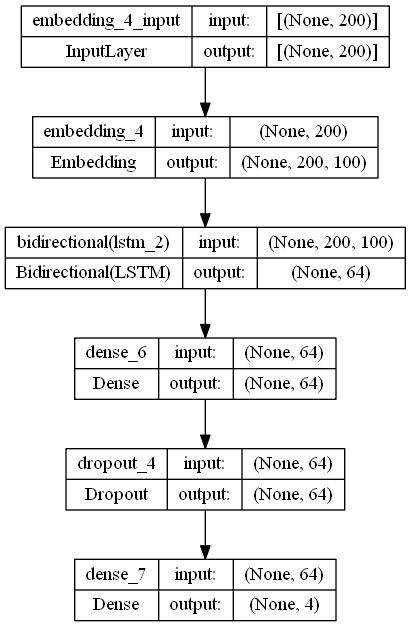

In [59]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)


In [59]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [52]:
#Create CNN model
model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 100, input_length=max_length))
model.add(keras.layers.Conv1D(32, kernel_size=8, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          4349000   
                                                                 
 conv1d (Conv1D)             (None, 193, 32)           25632     
                                                                 
 dropout (Dropout)           (None, 193, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3072)              0         
                                                      

In [58]:
# Create BiLSTM model
model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 100, input_length=max_length))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(32, dropout=0.4, recurrent_dropout=0.4)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          4349000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,387,468
Trainable params: 4,387,468
Non-trainable params: 0
____________________________________________

In [56]:
# Create LSTM model
model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 100, input_length=max_length))
model.add(keras.layers.LSTM(32, dropout=0.4, recurrent_dropout=0.4))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          4349000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,368,396
Trainable params: 4,368,396
Non-trainable params: 0
_________________________________________________________________


In [82]:
loss = 'categorical_crossentropy'
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy',keras.metrics.Precision(), keras.metrics.Recall()]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [83]:
history=model.fit(train_padded, train_labels, epochs=20,validation_data=(val_padded, val_labels))

Epoch 1/20
191/191 [==============================] - 50s 234ms/step - loss: 0.7784 - accuracy: 0.6868 - precision_8: 0.8996 - recall_8: 0.4874 - val_loss: 0.2028 - val_accuracy: 0.9410 - val_precision_8: 0.9451 - val_recall_8: 0.9364
Epoch 2/20
191/191 [==============================] - 44s 230ms/step - loss: 0.1459 - accuracy: 0.9639 - precision_8: 0.9673 - recall_8: 0.9605 - val_loss: 0.1087 - val_accuracy: 0.9640 - val_precision_8: 0.9676 - val_recall_8: 0.9600
Epoch 3/20
191/191 [==============================] - 43s 227ms/step - loss: 0.0475 - accuracy: 0.9890 - precision_8: 0.9906 - recall_8: 0.9874 - val_loss: 0.1266 - val_accuracy: 0.9666 - val_precision_8: 0.9678 - val_recall_8: 0.9653
Epoch 4/20
191/191 [==============================] - 43s 225ms/step - loss: 0.0258 - accuracy: 0.9938 - precision_8: 0.9946 - recall_8: 0.9933 - val_loss: 0.1632 - val_accuracy: 0.9613 - val_precision_8: 0.9639 - val_recall_8: 0.9613
Epoch 5/20
191/191 [==============================] - 43s 22

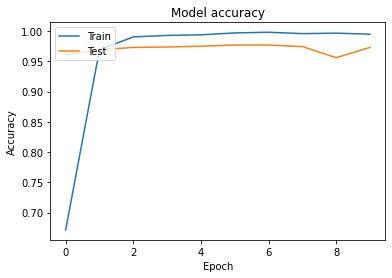

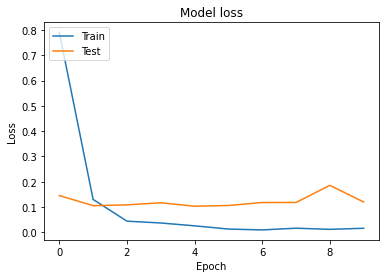

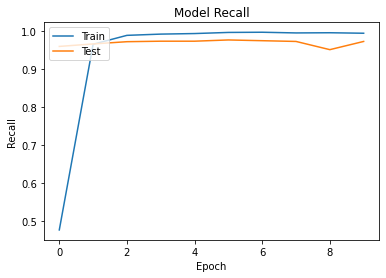

In [76]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['recall_6'])
plt.plot(history.history['val_recall_6'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [67]:
model.save('saved_model/my_model_1')

INFO:tensorflow:Assets written to: saved_model/my_model_1\assets


INFO:tensorflow:Assets written to: saved_model/my_model_1\assets


In [2]:
new_model = tf.keras.models.load_model('saved_model/my_model_1')

In [3]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          4349000   
                                                                 
 conv1d (Conv1D)             (None, 193, 32)           25632     
                                                                 
 dropout (Dropout)           (None, 193, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3072)              0         
                                                        

In [64]:
df_t=pd.read_csv('./test data.csv')

In [65]:
df_t

,text
0,"The Meta-owned social network says it is ""look..."
1,"TikTok said the policy applies to ""the Europea..."
2,Grab your Pogs and put on your best flannel sh...


In [66]:
df_t["text"] = df_t.text.map(remove_URL) # map(lambda x: remove_URL(x))
df_t["text"] = df_t.text.map(remove_punct)
df_t["text"] = df_t.text.map(remove_stopwords)

In [67]:
test_sentences = df_t.text.to_numpy()

In [68]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [69]:
len(test_sequences)

3

In [70]:
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")

In [71]:
pred = new_model.predict(test_padded)

1/1 [==============================] - 0s 97ms/step


In [72]:
pred

array([[2.7378590e-03, 9.9706692e-01, 5.3167003e-07, 1.9474112e-04],
       [1.1287737e-03, 9.8427528e-01, 2.1625069e-06, 1.4593693e-02],
       [3.0256638e-03, 6.3800658e-03, 9.8905307e-01, 1.5412559e-03]],
      dtype=float32)

In [73]:
list_label=[]
for i in pred:
    list_label.append(np.argmax(i))

In [74]:
list_label

[1, 1, 2]

In [ ]:
dftest=pd.read_csv('./test data.csv')

In [ ]:
dftest['label']=list_label

In [ ]:
dftest

In [88]:
x=0.9744
y=0.9731
z=2*x*y/(x+y)
z

0.973749566110398